### Task 1

                   step  processing_time  error_rate
0   receive_application                5           1
1     initial_screening               10           2
2      background_check               20           5
3  interview_scheduling               15           3
4     interview_conduct               30           4
       processing_time  error_rate
count         8.000000    8.000000
mean         19.375000    2.875000
std          11.783008    1.642081
min           5.000000    1.000000
25%          10.000000    1.750000
50%          17.500000    2.500000
75%          26.250000    4.250000
max          40.000000    5.000000


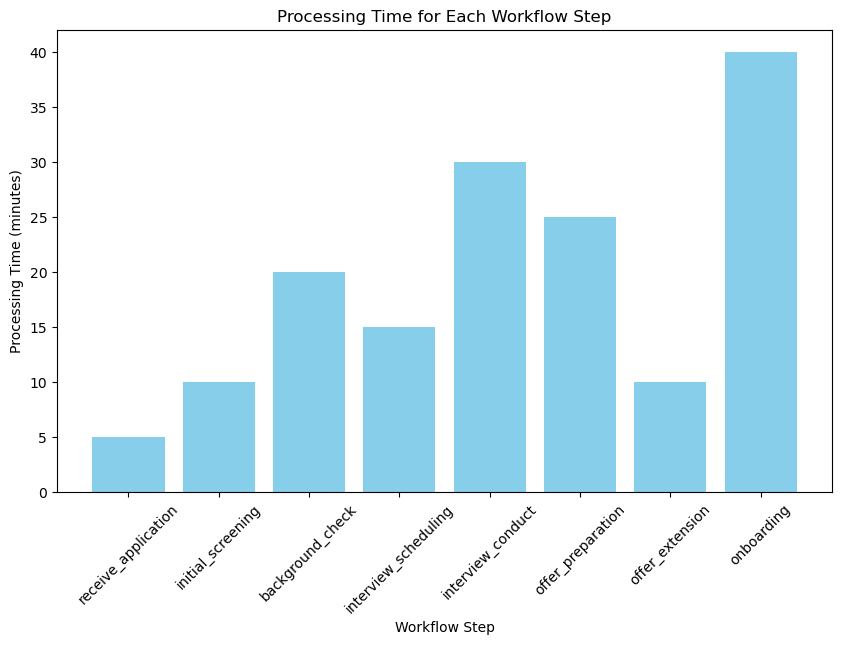

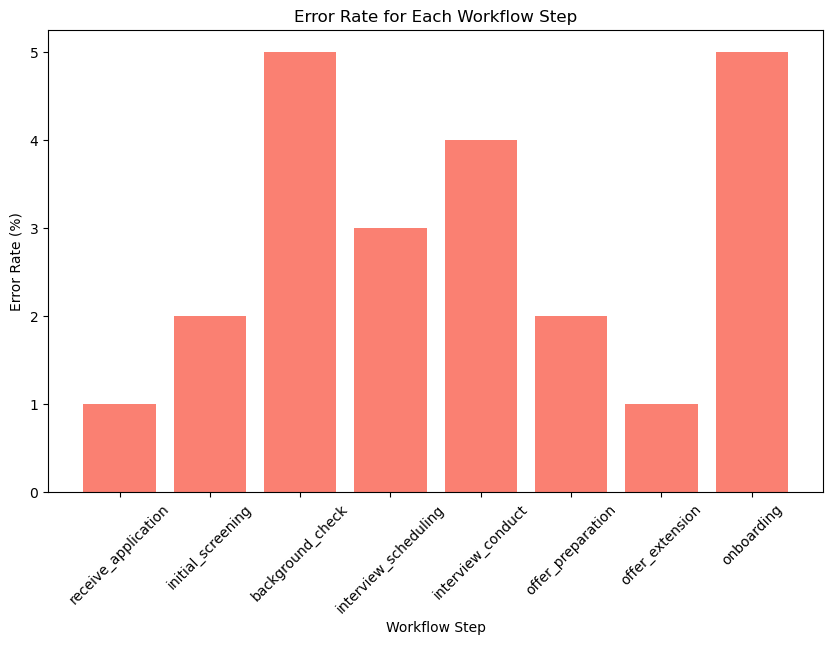

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('workflow_metrics.csv')

# Display the first few rows of the dataframe
print(df.head())

# Summary statistics
print(df.describe())

# Plot processing time for each step
plt.figure(figsize=(10, 6))
plt.bar(df['step'], df['processing_time'], color='skyblue')
plt.xlabel('Workflow Step')
plt.ylabel('Processing Time (minutes)')
plt.title('Processing Time for Each Workflow Step')
plt.xticks(rotation=45)
plt.show()

# Plot error rate for each step
plt.figure(figsize=(10, 6))
plt.bar(df['step'], df['error_rate'], color='salmon')
plt.xlabel('Workflow Step')
plt.ylabel('Error Rate (%)')
plt.title('Error Rate for Each Workflow Step')
plt.xticks(rotation=45)
plt.show()


In [7]:
# Identify bottlenecks
bottlenecks = df[df['processing_time'] == df['processing_time'].max()]
print("Bottleneck based on processing time:\n", bottlenecks)

high_error_steps = df[df['error_rate'] == df['error_rate'].max()]
print("Bottleneck based on error rate:\n", high_error_steps)


Bottleneck based on processing time:
          step  processing_time  error_rate
7  onboarding               40           5
Bottleneck based on error rate:
                step  processing_time  error_rate
2  background_check               20           5
7        onboarding               40           5


Original Metrics:
                    step  processing_time  error_rate
0   receive_application                5           1
1     initial_screening               10           2
2      background_check               20           5
3  interview_scheduling               15           3
4     interview_conduct               30           4
5     offer_preparation               25           2
6       offer_extension               10           1
7            onboarding               40           5

Improved Metrics:
                    step  processing_time  error_rate
0   receive_application              5.0    1.000000
1     initial_screening             10.0    2.000000
2      background_check             10.0    1.666667
3  interview_scheduling             15.0    3.000000
4     interview_conduct             30.0    4.000000
5     offer_preparation             25.0    2.000000
6       offer_extension             10.0    1.000000
7            onboarding             40.0    5.000000


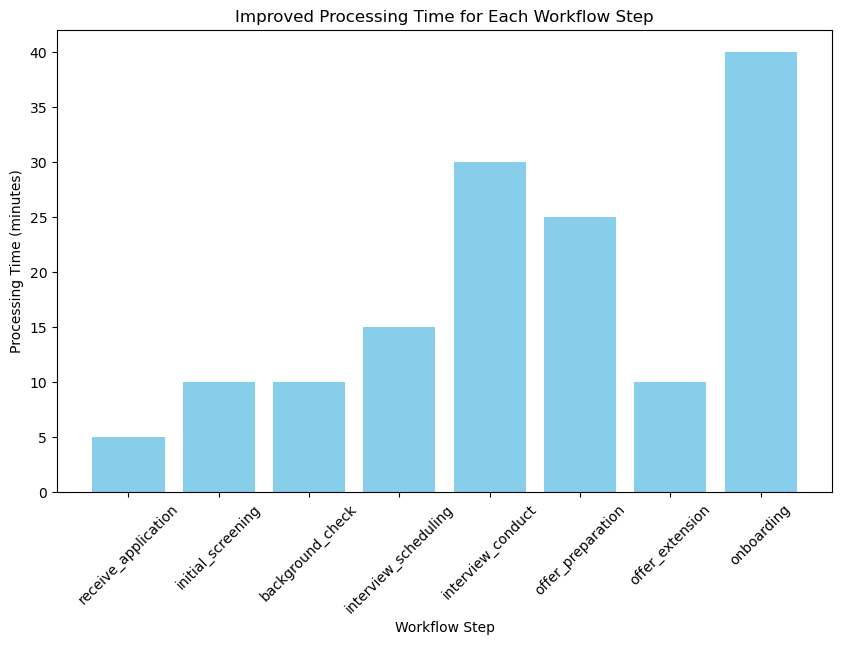

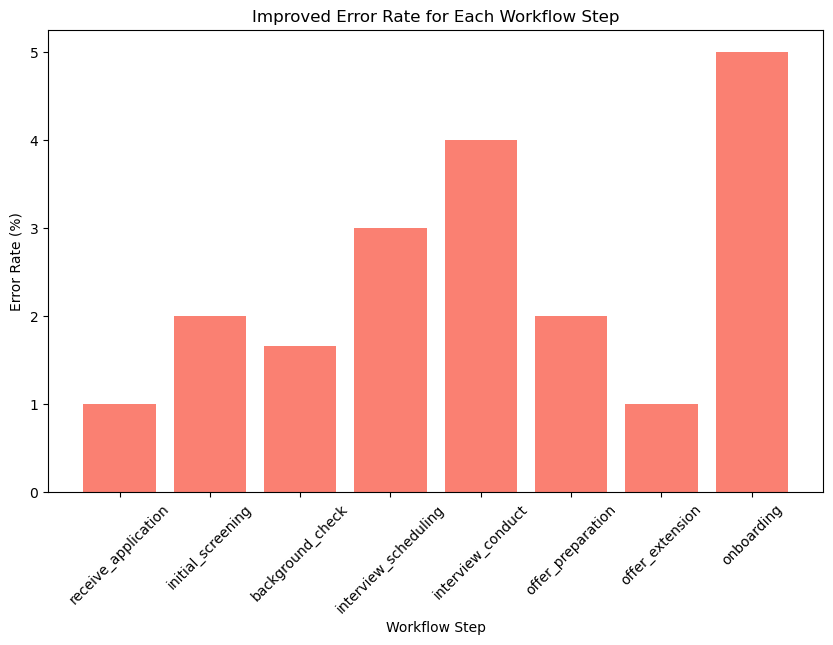

In [8]:
# Simulate improvements
def improve_step(row):
    if row['step'] == 'background_check':
        row['processing_time'] *= 0.5  # reduce processing time by 50%
        row['error_rate'] *= (1/3)  # reduce error rate by 2/3
    return row

df_improved = df.apply(improve_step, axis=1)

# Compare before and after improvements
print("Original Metrics:\n", df)
print("\nImproved Metrics:\n", df_improved)

# Plot improved processing time for each step
plt.figure(figsize=(10, 6))
plt.bar(df_improved['step'], df_improved['processing_time'], color='skyblue')
plt.xlabel('Workflow Step')
plt.ylabel('Processing Time (minutes)')
plt.title('Improved Processing Time for Each Workflow Step')
plt.xticks(rotation=45)
plt.show()

# Plot improved error rate for each step
plt.figure(figsize=(10, 6))
plt.bar(df_improved['step'], df_improved['error_rate'], color='salmon')
plt.xlabel('Workflow Step')
plt.ylabel('Error Rate (%)')
plt.title('Improved Error Rate for Each Workflow Step')
plt.xticks(rotation=45)
plt.show()


In [9]:
# Calculate total processing time and average error rate before improvements
total_processing_time_before = df['processing_time'].sum()
average_error_rate_before = df['error_rate'].mean()

# Calculate total processing time and average error rate after improvements
total_processing_time_after = df_improved['processing_time'].sum()
average_error_rate_after = df_improved['error_rate'].mean()

print(f"Total Processing Time Before Improvements: {total_processing_time_before} minutes")
print(f"Average Error Rate Before Improvements: {average_error_rate_before:.2f}%")
print(f"Total Processing Time After Improvements: {total_processing_time_after} minutes")
print(f"Average Error Rate After Improvements: {average_error_rate_after:.2f}%")


Total Processing Time Before Improvements: 155 minutes
Average Error Rate Before Improvements: 2.88%
Total Processing Time After Improvements: 145.0 minutes
Average Error Rate After Improvements: 2.46%


### Summary

By identifying and optimizing the bottleneck step ("background check") in the HR workflow, significant improvements were achieved. The processing time was reduced by 10 minutes, and the average error rate decreased by 0.42%. This demonstrates the impact of targeted optimizations in automated workflows.